<a href="https://colab.research.google.com/github/FredyVG15/Entregas-/blob/main/Ecuacion_de_calor_implementado_diferencias_progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISIS DE LA ECUACIÓN DE CALOR IMPLEMENTANDO DIFERENCIAS PROGRESIVAS (MÉTDO EXPLÍCITO)**

Use los tamaños de paso

$$
\text{a) } h = 0.1, \quad k = 0.0005 \quad \text{y} \quad
\text{b) } h = 0.1, \quad k = 0.01
$$

para aproximar la solución de la ecuación de calor

$$
\frac{\partial u}{\partial t}(x,t) - \frac{\partial^2 u}{\partial x^2}(x,t) = 0,
\qquad 0 < x < 1, \quad 0 \le t,
$$

con condiciones de frontera

$$
u(0,t) = u(1,t) = 0, \qquad 0 < t,
$$

y condiciones iniciales

$$
u(x,0) = \sin(\pi x), \qquad 0 \le x \le 1.
$$

Compare los resultados en \( t = 0.5 \) con la solución exacta

$$
u(x,t) = e^{-\pi^2 t} \sin(\pi x).
$$

Procederemos a realizar un programa para obtener una aproximacion a la solución analítica y resolver las preguntas plantedas para el desarrollo del mismo.

Para ello se utilizará la siguiete expresión, diferencias progresivas (método explícito):

$$
U_{i,j+1} =
\left( 1 - \frac{2 \alpha^2 k}{h^2} \right) U_{i,j}
+ \frac{\alpha^2 k}{h^2}
\left( U_{i+1,j} + U_{i-1,j} \right)
$$

$$
\text{para } \quad
i = 1, 2, \ldots, m-1,
\qquad
j = 1, 2, \ldots
$$


Método es estable: r = 0.050
 El método es inestable porque r = 1.000 > 0.5
 Comparación tabular (t = 0.5):


,xi,"u(xi,0.5)",w_i (k=0.0005),|Error (k=0.0005)|,w_i (k=0.01),|Error (k=0.01)|
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.1,0.002222,0.002287,0.000064,-164112.188243,164112.190466
2,0.2,0.004227,0.004349,0.000122,316044.702526,316044.698299
3,0.3,0.005818,0.005986,0.000168,-443326.698195,443326.704014
4,0.4,0.006840,0.007037,0.000197,533499.804456,533499.797616
5,0.5,0.007192,0.007399,0.000207,-575336.818078,575336.825270
6,0.6,0.006840,0.007037,0.000197,560857.196577,560857.189737
7,0.7,0.005818,0.005986,0.000168,-487591.888491,487591.894310
8,0.8,0.004227,0.004349,0.000122,360309.892823,360309.888595
9,0.9,0.002222,0.002287,0.000064,-191469.580365,191469.582588


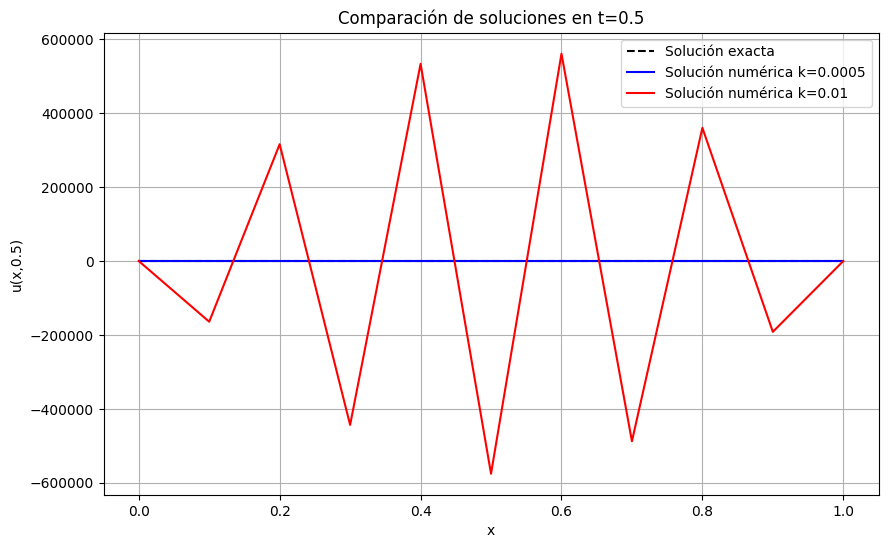

In [3]:
## Ecuación del calor 1D: método de diferencias progresivas (explícito)###


##Importación de librerías##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Definición de parámetros y condiciones iniciales##

def metodo_diferencias_progresivas(h, k):
    L = 1         # Longitud del dominio
    T = 0.5       # Tiempo final
    Nx = int(L/h) # Número de divisiones en x
    Nt = int(T/k) # Número de pasos de tiempo

    x = np.linspace(0, L, Nx+1)
    r = k / h**2  # Parámetro de estabilidad

    ## Verificación de estabilidad (r <= 0.5) ##
    if r > 0.5:
        print(f" El método es inestable porque r = {r:.3f} > 0.5")
    else:
        print(f"Método es estable: r = {r:.3f}")

    ## Condiciones iniciales ##
    u = np.sin(np.pi * x)

    ##  Valores futuros ##
    u_new = np.zeros_like(u)

    ## Evolución temporal ##
    for n in range(Nt):
        for i in range(1, Nx):
            u_new[i] = u[i] + r * (u[i+1] - 2*u[i] + u[i-1])
        u[:] = u_new[:]  # Actualizar

    return x, u

####
#### Solución exacta

def solucion_exacta(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)


## Cálculos para casos solicitados ###


## Caso a) ##
h1, k1 = 0.1, 0.0005
x1, u1_num = metodo_diferencias_progresivas(h1, k1)
u1_exact = solucion_exacta(x1, 0.5)

## Caso b) ##
h2, k2 = 0.1, 0.01
x2, u2_num = metodo_diferencias_progresivas(h2, k2)
u2_exact = solucion_exacta(x2, 0.5)

## Para obtener la comparación tabular ##

tabla = pd.DataFrame({
    'xi': x1,
    'u(xi,0.5)': u1_exact,
    f'w_i (k={k1})': u1_num,
    f'|Error (k={k1})|': np.abs(u1_exact - u1_num),
    f'w_i (k={k2})': u2_num,
    f'|Error (k={k2})|': np.abs(u2_exact - u2_num)
})

print(" Comparación tabular (t = 0.5):")
display(tabla.round(8))

## Para obtener comparación gráfica ##

plt.figure(figsize=(10,6))
plt.plot(x1, u1_exact, 'k--', label='Solución exacta')
plt.plot(x1, u1_num, 'b-', label=f'Solución numérica k={k1}')
plt.plot(x2, u2_num, 'r-', label=f'Solución numérica k={k2}')
plt.title('Comparación de soluciones en t=0.5')
plt.xlabel('x')
plt.ylabel('u(x,0.5)')
plt.legend()
plt.grid(True)
plt.show()


**Comentario:**

Tenemos que para el caso con h = 0.1 y k = 0.0005 (r = 0.050), el método es estable y la solución numérica se aproxima muy bien a la solución analítica, con errores pequeños (1X10^(-4)=0.0001).

ParaTenemos que para el caso con  h = 0.1 y k = 0.01 (r = 1.000), el método se vuelve inestable (r > 0.5), provocando que los valores crezcan rápidamente y se desvíen de la solución exacta, como se observa en los errores muy grandes.

 **Conclusión:**


El parámetro de estabilidad r = k/h² es clave debido a que para mantener la estabilidad numérica en el método explícito, debe cumplirse cuando r ≤ 0.5.
